# Least Squares Approximation Proposal

## Motivation

For a general linear system, let matrix $\textbf{A} \in M_{nxm}(R)$ and vector $\vec{b}\in \mathbb{R}^n$, we cannot always guarantee a solution $\vec{x}$ exists such that $\textbf{A}\vec{x} = \vec{b}$. However, is there a solution $\vec{x}$ such that $||\textbf{A}\vec{x}- \vec{b}||$ is as small as possible (i.e. the error/distance between our solution and the truth is as small as possible)? 

Yes, we can guarantee such an optimal solution with Least Squares Approximation.

## Definitions

We will be using the following definitions and notations in our writeup:

- Let $U\subset V$ be a finite dimensional subspace of some vector space V. 
- The Orthogonal Projection of $V$ onto $U$ is the linear transformation:

$$
proj_U: V \rightarrow V
\newline 
\vec{v} \rightarrow \vec{v}^{\parallel}

\newline

\text{where }\vec{v}^{\parallel}\text{ and }\vec{v}-\vec{v}^{\parallel}\in U^{\perp}
$$


## Theorem (1)

Let $U\subset V$ be as defined and $\overrightarrow{v}\in V$ Then,

$$
||\vec{v}-proj_U(\vec{v})|| \leq ||\vec{v}-\vec{u}|| \text{ for all } \vec{u} \in U
$$

Proof:

## Theoerm (2)

This answers our motivational question. The least squares solutions to the linear systerm $\textbf{A}\vec{x} = \vec{b}$ are the solutions to the linear system,

$$
(\textbf{A}^T\textbf{A})\vec{x}=\textbf{A}^T\vec{b}
$$

Proof:

## Application of Least Square Solutions on Real Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import math

/var/folders/g2/_vml05q979nckwnglt908jqc0000gn/T/ipykernel_41913/3742787168.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Before we begin, we need to preprocess/clean the data which we will not fo over in indepth details.

In [25]:
data = pd.read_csv("./data/2015.csv")
data_nona = data.dropna()
data_clean = data_nona.filter(['Country','Happiness Score','Economy (GDP per Capita)','Freedom'], axis=1)


158

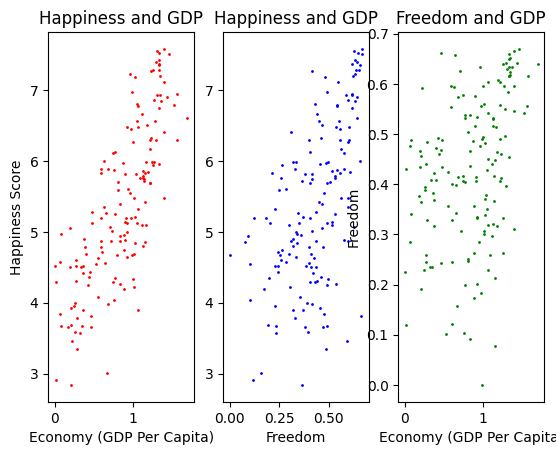

In [3]:
# Create a figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Plot subplot 1
ax1.scatter(data_clean['Economy (GDP per Capita)'], data_clean['Happiness Score'], color='r', s=1)
ax1.set_title("Happiness and GDP")
ax1.set_xlabel('Economy (GDP Per Capita)')
ax1.set_ylabel('Happiness Score')

# Plot subplot 2
ax2.scatter(data_clean['Freedom'], data_clean['Happiness Score'], color='b', s=1)
ax2.set_title("Happiness and GDP")
ax2.set_xlabel('Freedom')

# grid plot

ax3.scatter(data_clean['Economy (GDP per Capita)'], data_clean['Freedom'], color='g', s=1)
ax3.set_title("Freedom and GDP")
ax3.set_xlabel('Economy (GDP Per Capita)')
ax3.set_ylabel('Freedom')

# Show plot
plt.show()

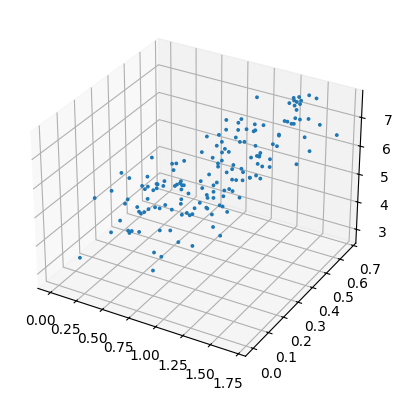

In [4]:
# Create a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot 3D scatter plot
ax.scatter3D(data_clean['Economy (GDP per Capita)'], data_clean['Freedom'], data_clean['Happiness Score'], s=3, alpha = 1)

# Show plot
plt.show()

In [26]:
# create a piecewise 2d-interpolation

# firstly, we need to define a grid that the pieces are defined by.

def create_ngrids(n, xrange, yrange): 
    x = []
    y = []
    xdiff = (xrange[1]- xrange[0])/n
    ydiff = (yrange[1]- yrange[0])/n
    for k in range(n+1):
        x.append(xrange[0] + k * xdiff)
        y.append(yrange[0] + k * ydiff)
    
    grid = []
    counter = 0 
    for i in range(n):
        for j in range(n):
            grid.append({ counter : [(x[i], y[j]), (x[i+1], y[j]), (x[i+1], y[j+1]), (x[i], y[j+1])]})
            counter += 1
    
    return grid

In [54]:
# fit the points into the matrix

collections = []

grids = create_ngrids(3, [0,2], [0,1])
new_grids = []

for grid in grids:
    data_points = []
    for i in range(data_clean.shape[0]):
        x = data_clean.iloc[i, 2]
        y = data_clean.iloc[i, 3]
        t = list(grid.values())[0]
        if (t[0][0] <= x < t[1][0]) and (t[0][1] <= y < t[2][1]):
            data_points.append((x, y))
    if len(data_points) > 0:
        collections.append(data_points)
        new_grids.append(grid)

grids = new_grids


In [55]:
rearranged_output = []
for points in collections:
    for point in points:
        rearranged_output.append(data_clean.loc[(data_clean['Economy (GDP per Capita)'] == point[0]) & (data_clean['Freedom'] == point[1])]["Happiness Score"].values[0])
rearranged_output = np.asarray(rearranged_output)


In [56]:
# Create matrix of data

def create_AMatrix(points):
    rows = []
    for p in points:
        row = []
        for i in range(len(points)):
            if i == 0:
                row.append(1)
            else:
                row.append(p[0])
                for i in range(len(points)):
                    row.append
    M = np.array(rows)
    return M

diag_matrices = []
for points in collections:
        diag_matrices.append(create_AMatrix(points))

len(collections)

7

In [57]:
from scipy.sparse import block_diag

A = block_diag(diag_matrices)
A = A.toarray()


In [58]:
H = np.matmul(A.transpose(),A)
coefficients = np.matmul(np.linalg.inv(H), np.matmul(A.transpose(), rearranged_output))

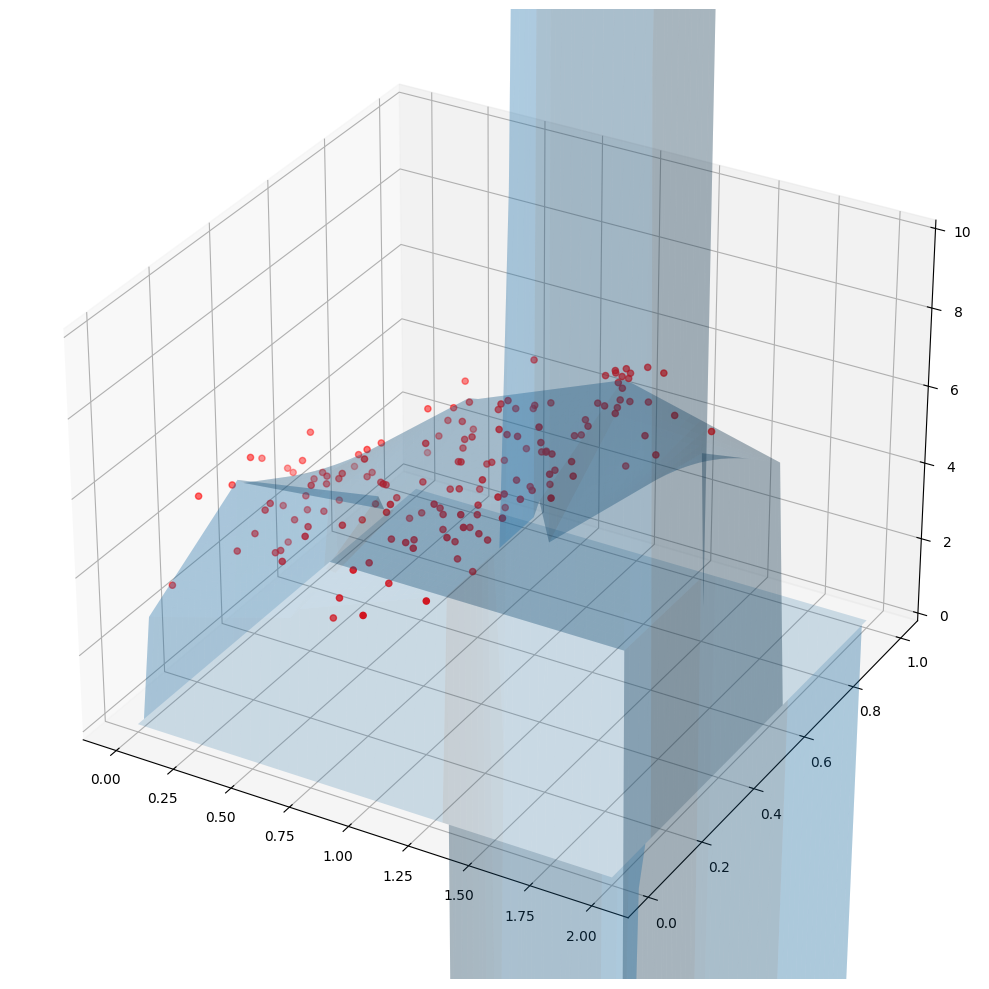

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(0, 2, 50)
y = np.linspace(0, 1, 50)
x, y = np.meshgrid(x, y)

eq_combined = np.zeros_like(x)
i = 0

for grid in grids:
    t = list(grid.values())[0]
    mask = (t[0][0] < x) & (x < t[1][0]) & (t[0][1] < y) & (y < t[2][1])
    eq_combined[mask] = coefficients[i] + coefficients[i + 1] * x[mask] + coefficients[i+2] * y[mask] + coefficients[i+3] * x[mask] * y[mask]
    i += 4
    
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Plot the combined piecewise equation
ax.plot_surface(x, y, eq_combined, alpha=0.2)
ax.scatter(data_clean["Economy (GDP per Capita)"], data_clean["Freedom"], data_clean["Happiness Score"], color='red', label='Points')

ax.set_zlim(0,10)

plt.show()

In [60]:
z_hat = np.matmul(A, coefficients)

In [61]:
error = np.sum((data_clean["Happiness Score"] - z_hat) ** 2)

In [62]:
error/158

65.52552572681776

The Equation we are trying to solve:

$$
(i) \quad \beta _0 + \beta _1 \times \text{(Resource Allocation)} + \beta _2 \times \text{(Mental Fatigue)} = \text{Burnout Rate} 
$$

Notice the parabolic trend in the plot `Mental Fatigue` against `Burnout Rate`; another posibility is to add a quadratic part into our model,

$$

(ii) \quad \beta _0 + \beta _1 \times \text{(Resource Allocation)} + \beta _2 \times \text{(Mental Fatigue)} + \beta _3 \times \text{(Mental Fatigue)}^2 = \text{Burnout Rate}

$$

Going back to our topic of interest, how does this relate to our notion of least squares solutions?

Notice, for both equations (i) and (ii) we are just interested in finding optimal values for $\beta$'s then writing the equations in matrix notation gives us Theorem (2) from above,

Consider the following definitions,
$$
\overrightarrow{\text{Resource Allocation}} = (x_1, x_2, ... x_n), \quad \overrightarrow{\text{Mental Fatigue}} = (y_1, x_2, ..., y_n), \quad
\overrightarrow{\text{Burn Rate}} = (z_1, z_2, ..., z_n),
$$

then equation (i) is simply (equation (ii) is analogous),
$$
\newline
\textbf{A}\vec{\beta} = \vec{z}
$$

where $\bold{A}$ is the matrix,

$$
\textbf{A} = \begin{pmatrix}
1 & x_1 & y_1\\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots\\
1 & x_n & y_n
\end{pmatrix}
$$

and $\beta$ is a vector of coefficients (in the case of equation i),

$$
\vec{\beta} = \begin{pmatrix}
\beta _0\\
\beta _1\\
\beta _2
\end{pmatrix}
$$